In [1]:
library(DirichletMultinomial)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges



In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks BiocGenerics::combine()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()     masks IRanges::reduce()
✖ dplyr::rename()     masks S4Vectors::rename()
✖ dplyr::slice()      masks IRanges::slice()


In [3]:
fname='/home/hsher/scratch/circ_nextera_iter2/output/edits/HEK_rar11.dp4.neg.vcf.aggregated.nonzero.tsv'

In [4]:
count_df = read_tsv(fname)

Rows: 336580 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pos_id
dbl (2): n_ref, n_alt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
nread=30
count_df <- count_df[count_df$n_ref+count_df$n_alt>nread,]

In [6]:
head(count_df)

pos_id,n_ref,n_alt
<chr>,<dbl>,<dbl>
GL000195.1:46557|49119:1078,30,1
GL000195.1:46557|49119:1079,22,10
GL000195.1:46557|49119:1736,25,7
GL000195.1:46557|49119:2525,67,2
GL000195.1:48444|49119:638,69,2
GL000195.1:48955|66099:1050,92,1


In [7]:
count <- as.matrix(count_df[c('n_alt','n_ref')])

In [8]:
full <- TRUE ### TODO: change to TRUE

min_component = 1
max_component = 5
component_gap = 1
comp_attempt = seq(min_component, max_component, component_gap)

In [9]:
basedir='/home/hsher/scratch/circ_nextera_iter2_bbm'
out_stem='HEK_rar11.dp4.neg'

In [10]:
library(parallel)

if (full) {
fit <- lapply(comp_attempt, dmn, count=count, verbose=TRUE)
save(fit, file=file.path(basedir, paste0(out_stem, ".fit.rda")))
} else load(file = file.path(basedir, paste0(out_stem, ".fit.rda")))


dmn, k=1



  Soft kmeans
  Expectation Maximization setup
  Expectation Maximization
  Hessian


dmn, k=2



  Soft kmeans
    iteration 10 change 0.001414
  Expectation Maximization setup
  Expectation Maximization
    iteration 10 change 1.481516
    iteration 20 change 0.000002
  Hessian


dmn, k=3



  Soft kmeans
    iteration 10 change 0.082312
    iteration 20 change 0.003742
    iteration 30 change 0.000087
    iteration 40 change 0.000002
  Expectation Maximization setup
  Expectation Maximization
    iteration 10 change 38.687126
    iteration 20 change 0.666576
    iteration 30 change 0.112624
    iteration 40 change 0.036747
    iteration 50 change 0.011618
    iteration 60 change 0.003373
    iteration 70 change 0.001006
    iteration 80 change 0.001052
    iteration 90 change 0.000543
    iteration 100 change 0.000253
  Hessian


dmn, k=4



  Soft kmeans
    iteration 10 change 0.002882
    iteration 20 change 0.000488
    iteration 30 change 0.000159
    iteration 40 change 0.000083
    iteration 50 change 0.000050
    iteration 60 change 0.000033
    iteration 70 change 0.000023
    iteration 80 change 0.000016
    iteration 90 change 0.000012
    iteration 100 change 0.000009
    iteration 110 change 0.000007
    iteration 120 change 0.000005
    iteration 130 change 0.000004
    iteration 140 change 0.000003
    iteration 150 change 0.000002
    iteration 160 change 0.000002
    iteration 170 change 0.000001
    iteration 180 change 0.000001
  Expectation Maximization setup
  Expectation Maximization
    iteration 10 change 71.933119
    iteration 20 change 34.890390
    iteration 30 change 17.685148
    iteration 40 change 6.647919
    iteration 50 change 2.919519
    iteration 60 change 1.184653
    iteration 70 change 0.499747
    iteration 80 change 0.214806
    iteration 90 change 0.092922
    iteration 100 chang

dmn, k=5



  Soft kmeans
    iteration 10 change 0.017381
    iteration 20 change 0.010206
    iteration 30 change 0.021749
    iteration 40 change 0.009732
    iteration 50 change 0.000359
    iteration 60 change 0.000010
  Expectation Maximization setup
  Expectation Maximization
    iteration 10 change 134.341086
    iteration 20 change 84.684966
    iteration 30 change 24.540595
    iteration 40 change 7.778304
    iteration 50 change 1.581434
    iteration 60 change 0.258937
    iteration 70 change 0.047809
    iteration 80 change 0.012465
    iteration 90 change 0.003294
    iteration 100 change 0.007019
  Hessian


In [11]:
lplc <- sapply(fit, laplace)
aic <- sapply(fit, AIC)
bic <- sapply(fit, BIC)
 pdf(file.path(basedir, paste0(out_stem, ".goodness_of_fit.pdf")))
 plot(aic, type="b", xlab="Number of Dirichlet Components(k)",ylab="AIC")
 plot(bic, type="b", xlab="Number of Dirichlet Components(k)",ylab="BIC")
 plot(lplc, type="b", xlab="Number of Dirichlet Components(k)",ylab="Model Fit(Laplace)")
 dev.off()


png 
  2

In [12]:

  # find the best model: the DMN object
 (best <- fit[[which.min(bic)]])

class: DMN 
k: 4 
samples x taxa: 150703 x 2 
Laplace: 316357.6 BIC: 316354.1 AIC: 316299.5 

In [13]:
best

class: DMN 
k: 4 
samples x taxa: 150703 x 2 
Laplace: 316357.6 BIC: 316354.1 AIC: 316299.5 

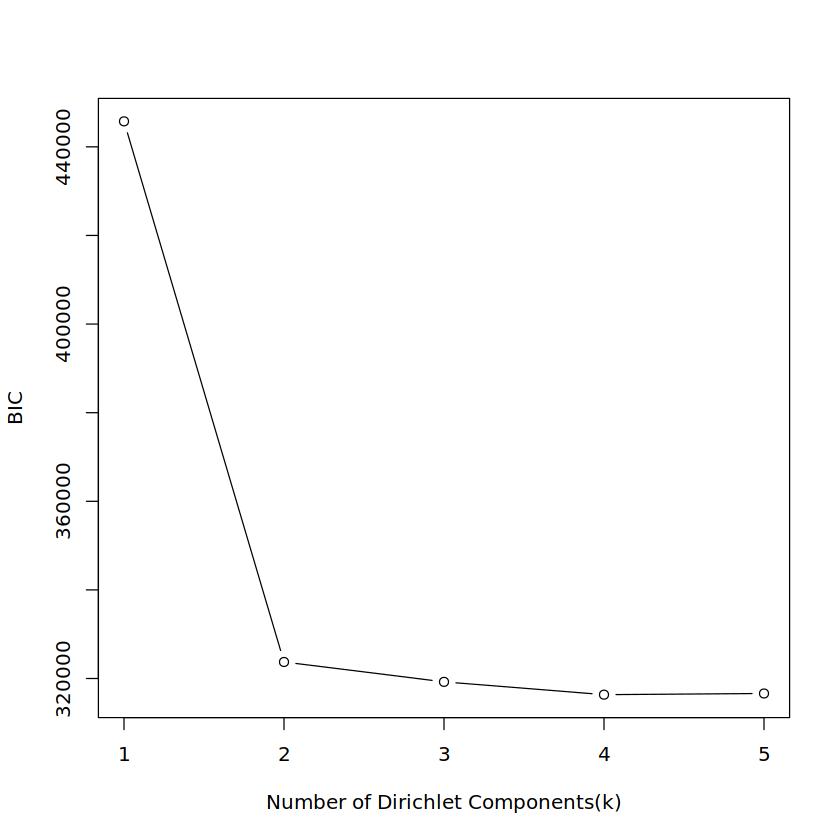

In [14]:
plot(bic, type="b", xlab="Number of Dirichlet Components(k)",ylab="BIC")

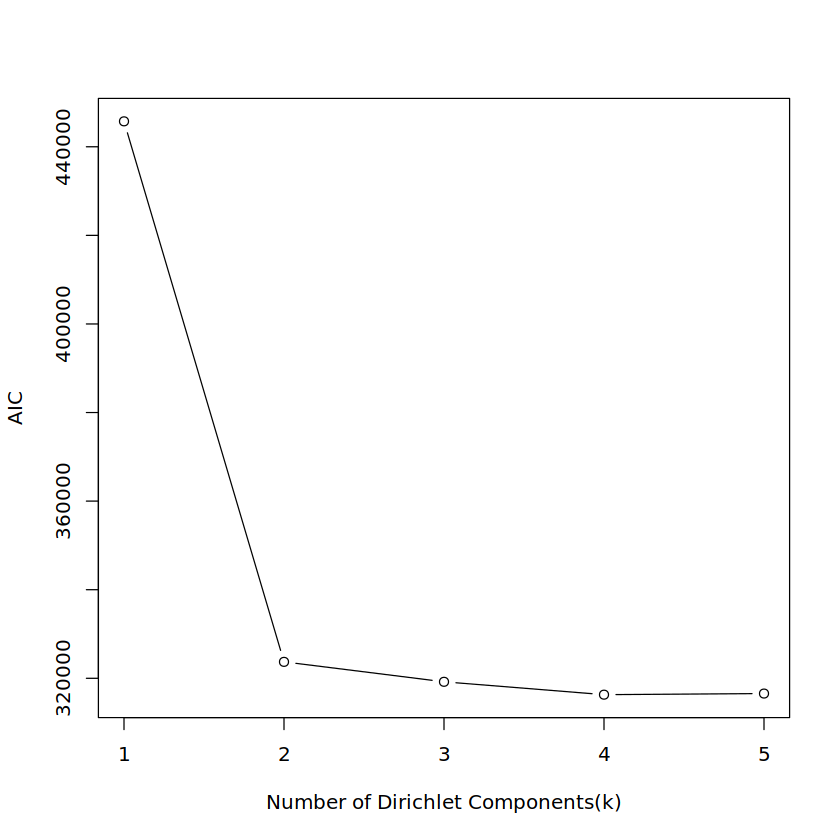

In [15]:
plot(aic, type="b", xlab="Number of Dirichlet Components(k)",ylab="AIC")

In [16]:
fitted(best, scale = TRUE)

n_alt,0.007608416,0.03656959,0.3361296,0.9699678
n_ref,0.992391584,0.96343041,0.6638704,0.0300322


In [17]:
weights = mixturewt(best)

In [30]:
t(weights)

pi,0.7857123,0.1356313,0.05118156,0.02747485
theta,3648.3899200,92.1146179,3.35606027,1.50220585


In [19]:
count_df['cluster']<-c(mixture(best, assign = TRUE))

In [20]:
count_df

pos_id,n_ref,n_alt,cluster
<chr>,<dbl>,<dbl>,<int>
GL000195.1:46557|49119:1078,30,1,1
GL000195.1:46557|49119:1079,22,10,3
GL000195.1:46557|49119:1736,25,7,3
GL000195.1:46557|49119:2525,67,2,1
GL000195.1:48444|49119:638,69,2,1
GL000195.1:48955|66099:1050,92,1,1
GL000195.1:48955|66099:127,106,1,1
GL000195.1:48955|66099:980,26,11,3
GL000195.1:48955|67302:1050,92,2,1


In [31]:

hek2='/home/hsher/scratch/circ_nextera/output/edits/circseq-bm-rar11-nxt.dp4.neg.vcf.aggregated.nonzero.tsv'
hek2_df = read_tsv(hek2)

apo='/home/hsher/scratch/circ_nextera_iter13/output/edits/APOBEC1only.dp4.neg.vcf.aggregated.nonzero.tsv'
apo_df = read_tsv(apo)

yth='/home/hsher/scratch/circ_nextera_iter13/output/edits/YTHDF2_STAMP.dp4.neg.vcf.aggregated.nonzero.tsv'
yth_df = read_tsv(yth)

Rows: 247011 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pos_id
dbl (2): n_ref, n_alt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 338572 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pos_id
dbl (2): n_ref, n_alt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 535399 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): pos_id
dbl (2): n_ref, n_alt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [33]:
#count_df['is_in_hek293']=count_df$pos_id %in% c(hek_df$pos_id)
count_df['is_in_hek293_2']=count_df$pos_id %in% c(hek2_df$pos_id)
count_df['is_in_APOBEC']=count_df$pos_id %in% c(apo_df$pos_id)
count_df['is_in_YTHDF2_STAMP']=count_df$pos_id %in% c(yth_df$pos_id)

In [23]:
sum(count_df$is_in_hek293_2)

[1] 7869

In [34]:
aggregate(count_df[, c('is_in_hek293_2','is_in_APOBEC','is_in_YTHDF2_STAMP')], list(count_df$cluster), mean)

Group.1,is_in_hek293_2,is_in_APOBEC,is_in_YTHDF2_STAMP
<int>,<dbl>,<dbl>,<dbl>
1,0.02684475,0.01829017,0.02960304
2,0.07318979,0.02014239,0.03924292
3,0.30300273,0.18471338,0.23051259
4,0.40457819,0.29706790,0.32278807


In [25]:
sum(count_df[count_df$is_in_hek293, c('n_ref')])

Warning message:
“Unknown or uninitialised column: `is_in_hek293`.”


[1] 0

In [26]:
sum(count_df[count_df$is_in_hek293, c('n_alt')])

Warning message:
“Unknown or uninitialised column: `is_in_hek293`.”


[1] 0

In [27]:
39606/297383

[1] 0.1331818